The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [Internet Archive Wayback Machine](https://web.archive.org/web/20180630204548/http://seaborn.pydata.org/).  

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

## Packages / Importing the file

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignores future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
# Read dataset
df = pd.read_csv('files/pokemon.csv', index_col=0)

In [15]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.

* Just to satisfy my own curiosity, I looked at how many Pokemon are in this dataset and got a list of the Legendary Pokemon.
* There are `151` Pokemon of which `4` are Legendary. This indicates the dataset is Generation I.

In [25]:
print(df.shape)
df[df['Legendary']==True]

(151, 12)


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


## Scatterplot

* Since *seaborn* doesn't have a native scatterplot function, we use the function for fitting and plotting the regression line. We remove this simply with the argument `fit_reg=False`.

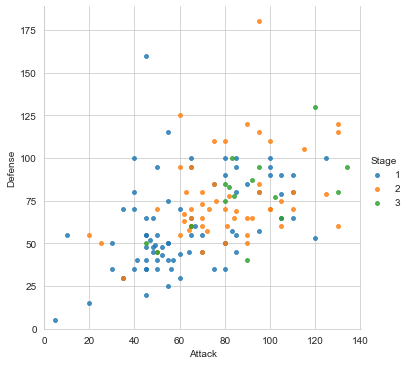

In [56]:
sns.lmplot(x='Attack', y='Defense', data=df,
           hue='Stage', # Colour by evolution stage
           fit_reg=False, # Removes the regression line
           scatter_kws={"s": 15}) # Sets the size of the markers
plt.ylim(0, None) # Limits of x-axis
plt.xlim(0, None) # Limits of y-axis
plt.show()

## Box Plot

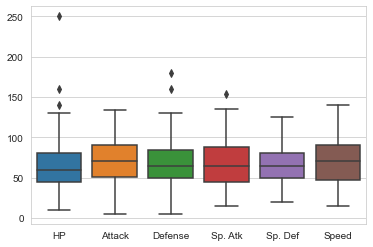

In [119]:
stats = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats)
plt.show()

## Colour Palette

Before going any further, let's create a colour palette representing each Pokemon's type:

In [120]:
colours = ['#78C850',  # Grass
           '#F08030',  # Fire
           '#6890F0',  # Water
           '#A8B820',  # Bug
           '#A8A878',  # Normal
           '#A040A0',  # Poison
           '#F8D030',  # Electric
           '#E0C068',  # Ground
           '#EE99AC',  # Fairy
           '#C03028',  # Fighting
           '#F85888',  # Psychic
           '#B8A038',  # Rock
           '#705898',  # Ghost
           '#98D8D8',  # Ice
           '#7038F8',  # Dragon
          ]

## Violin Plot

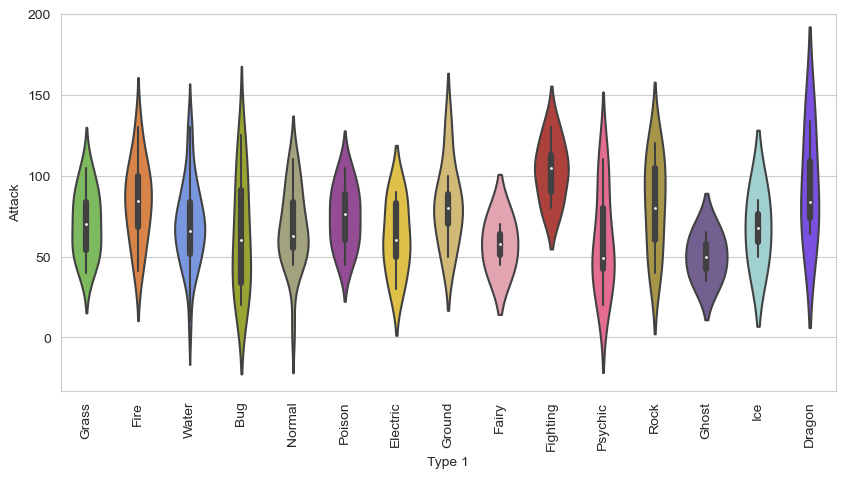

In [121]:
plt.figure(figsize=(10,5), dpi=100)
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=df,
              palette=colours)
plt.xticks(rotation=90)
plt.ylim(None, 200)
plt.show()

## Swarm Plot

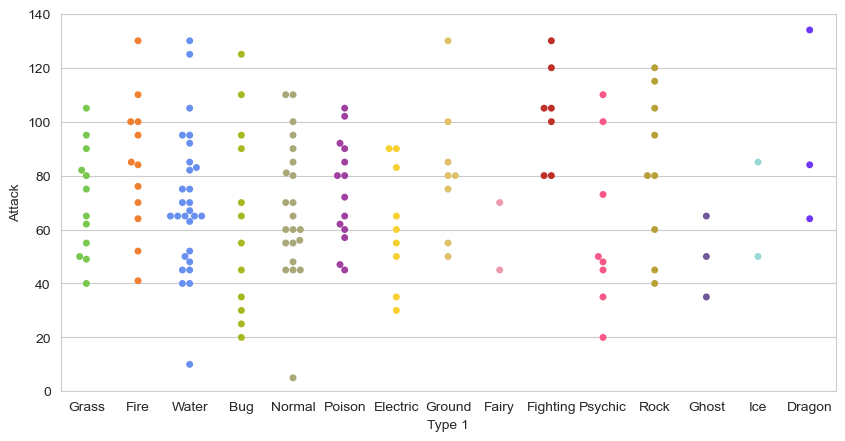

In [122]:
plt.figure(figsize=(10,5), dpi=100)
sns.swarmplot(x='Type 1', y='Attack', data=df,
              palette=colours)
plt.ylim(0, 140)
plt.show()

## Overlaying Plots

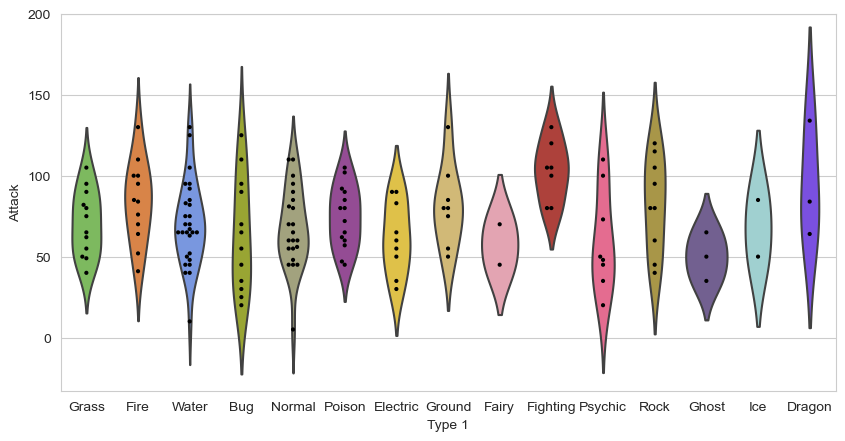

In [123]:
plt.figure(figsize=(10,5), dpi=100)
sns.violinplot(x='Type 1', y='Attack', data=df,
               inner=None, # Removes the vertical line inside the violin plot
               palette=colours)
sns.swarmplot(x='Type 1', y='Attack', data=df,
              color='black', s=3)
plt.ylim(None, 200)
plt.show()

## `Melt` Function

You'll notice that currently, the statistics are split into separate columns, that is `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

In [139]:
print(stats.shape)
stats.head()

(151, 9)


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


What the `melt` function does, is to put this all into one column. So instead of 151 rows, it becomes 151 rows x 6 statistics = 906 rows. It's easier to understand if you see the result:

In [140]:
melted = pd.melt(stats,
                 id_vars=['Name', 'Type 1', 'Type 2'], # Variables to keep
                 var_name='Stat') # Name of melted variable
print(melted.shape)
melted.head()

(906, 5)


,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


By the way, in case you were wondering: is there a way to 'un-melt' a dataset, there is in fact a [way](https://stackoverflow.com/questions/22127569/opposite-of-melt-in-python-pandas). One of the methods we could use is `pivot_table`.

In [158]:
melted.pivot_table(index='Name', columns='Stat', values='value').head().reset_index()

Stat,Name,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
0,Abra,20.0,15.0,25.0,105.0,55.0,90.0
1,Aerodactyl,105.0,65.0,80.0,60.0,75.0,130.0
2,Alakazam,50.0,45.0,55.0,135.0,95.0,120.0
3,Arbok,85.0,69.0,60.0,65.0,79.0,80.0
4,Arcanine,110.0,80.0,90.0,100.0,80.0,95.0


Swarmplot revisited:

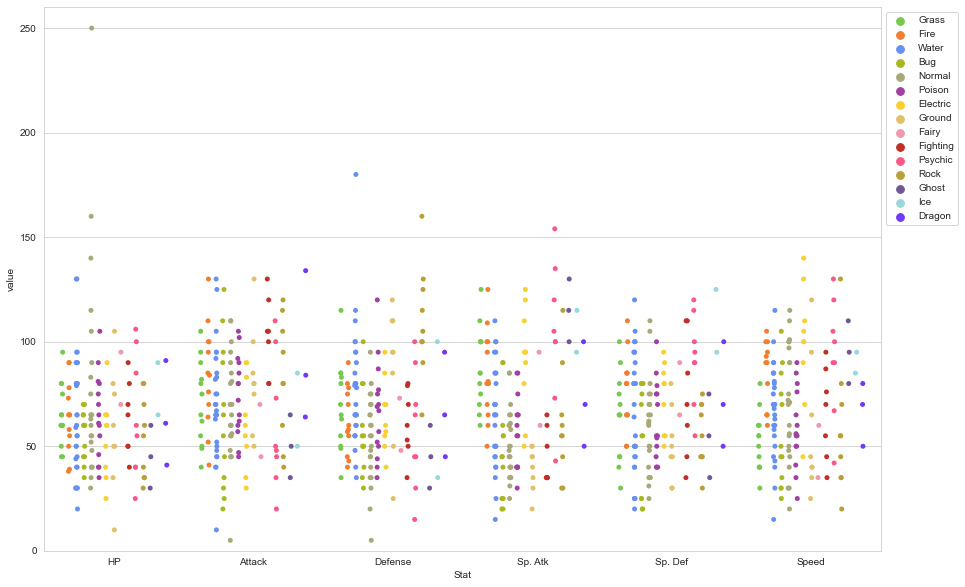

In [231]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Stat', y='value', data=melted,
             hue='Type 1', dodge=True, palette=colours)
plt.ylim(0, 260)
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

## Other Graphics

Heatmap:

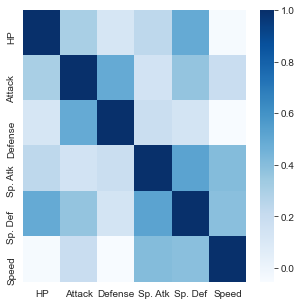

In [239]:
plt.figure(figsize=(5,5))
corr = stats.corr()
sns.heatmap(corr, cmap='Blues')
plt.show()

Histogram:

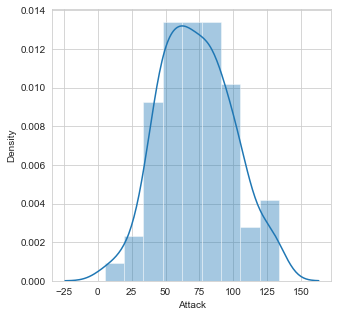

In [274]:
plt.figure(figsize=(5,5))
sns.distplot(stats.Attack)
plt.show()

Bar plot:

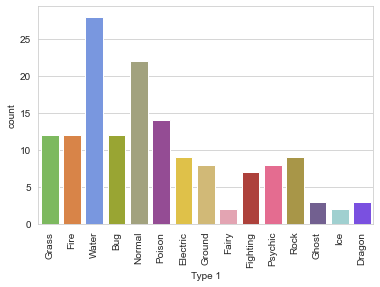

In [242]:
sns.countplot(x='Type 1', data=df, palette=colours)
plt.xticks(rotation=90)
plt.show()

Factor plot:

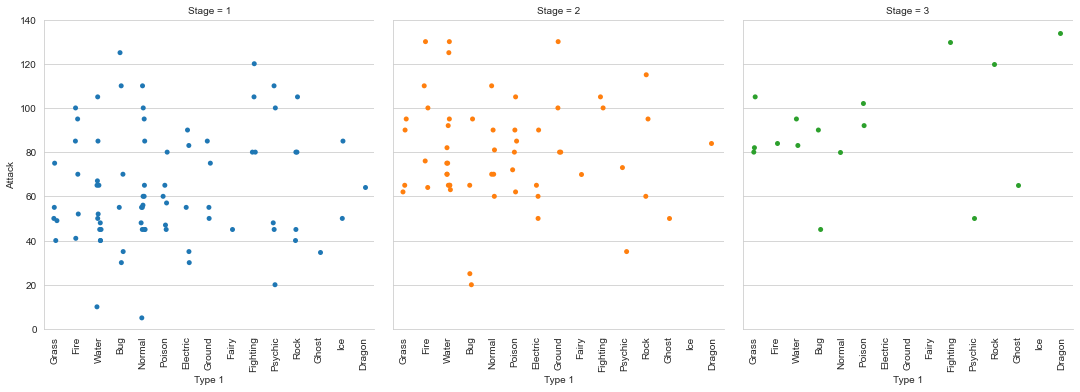

In [261]:
ax = sns.catplot(x='Type 1', y='Attack', data=df,
               hue='Stage',
               col='Stage',
               kind='strip', sharex=True)
ax.set_xticklabels(rotation=90)
plt.ylim(0, 140)
plt.show()

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://web.archive.org/web/20180621043054/https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles) on that for the version in Anaconda.

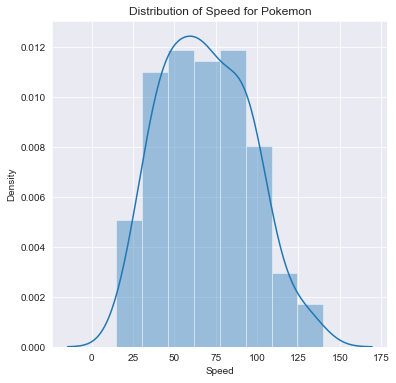

In [272]:
plt.figure(figsize=(6,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")
plt.show()

## Resources

* [Changing marker size in lmplot](https://stackoverflow.com/questions/34796451/changing-the-marker-size-in-python-seaborn-lmplot)
* [Opposite of melt function](https://stackoverflow.com/questions/22127569/opposite-of-melt-in-python-pandas)
* [Two seaborn plots side by side](https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn)
* [Suppress pandas future warning](https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning)